# Prediksi Harga Laptop dengan Machine Learning (Regresi)

Dataset: **Laptop Price Dataset** (Kaggle)  
Link: https://www.kaggle.com/datasets/muhammetvarl/laptop-price  

Pada notebook ini, kami akan membangun model regresi untuk 
memprediksi **Price_euros** (harga laptop) berdasarkan spesifikasi 
seperti merk (Company), tipe laptop, ukuran layar, RAM, tipe penyimpanan, 
GPU, sistem operasi, dan lain-lain.

Blok 1 ini berisi:
1. Import library dasar
2. Load dataset dari file `.csv`
3. Melihat struktur awal dataset (shape, kolom, tipe data, dan contoh isi)


# *Setup & Load Dataset*

In [4]:
# --- Import library dasar untuk analisis data ---
import pandas as pd
import numpy as np

# Visualisasi (akan dipakai nanti)
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

print("Library berhasil di-import.")


Library berhasil di-import.


In [5]:
# --- Load dataset ---
df = pd.read_csv("datasets/laptop_price.csv", encoding='latin1')

print("Dataset berhasil dibaca!")


Dataset berhasil dibaca!


In [6]:
# --- Melihat 5 baris pertama ---
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
print("Jumlah Baris  :", df.shape[0])
print("Jumlah Kolom :", df.shape[1])

Jumlah Baris  : 1303
Jumlah Kolom : 13


In [8]:
# Informasi lengkap dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
# Mengecek apakah ada missing values di tiap kolom
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
# Statistik ringkas (khusus numeric)
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## Ringkasan Awal Dataset

- Dataset memuat **1303 baris** dan **13 kolom**.
- Target variabel adalah `Price_euros`.
- Mayoritas kolom bertipe *object* (kategorikal atau campuran).
- Kolom numerik utama: `Inches`, `Ram`, `Weight`.
- Tidak ditemukan missing values.
- Dataset siap dilanjutkan ke tahap preprocessing.

Tahap berikutnya → **Cleaning & Data Preprocessing**.


# *Cleaning & Data Preprocessing*

Pada tahap ini, kita melakukan pembersihan data mentah agar fitur siap untuk dianalisis dan digunakan pada model Machine Learning.

### Fokus utama Block 2:
1. Membersihkan kolom numerik yang masih berupa string:
   - `Ram` → "8GB" menjadi 8
   - `Weight` → "1.37kg" menjadi 1.37

2. Memproses kolom kompleks:
   - `Memory` → dipisah menjadi `SSD`, `HDD`, `Flash_Storage`, dll.
   - `Cpu` → ekstraksi CPU brand, model, dan clockspeed
   - `ScreenResolution` → ekstrak resolusi X, resolusi Y, serta fitur panel

3. Menghapus kolom tidak relevan:
   - `laptop_ID`

Setelah tahap ini selesai, dataset akan siap masuk Block 3 (Encoding & Scaling).


In [11]:
# Menghapus kolom ID yang tidak relevan
if 'laptop_ID' in df.columns:
    df.drop('laptop_ID', axis=1, inplace=True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [12]:
# Membersihkan kolom RAM
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: int64

In [13]:
# Membersihkan kolom Weight
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

In [14]:
# Persiapan kolom baru
df['SSD'] = 0
df['HDD'] = 0
df['Flash_Storage'] = 0
df['Hybrid'] = 0

for i, row in df.iterrows():
    mem = row['Memory']

    # Jika ada lebih dari satu storage: SSD + HDD
    parts = mem.split('+')

    for p in parts:
        p = p.strip()

        # Konversi TB → GB
        size = 0
        if 'TB' in p:
            size = int(float(p.split('TB')[0]) * 1024)
        else:
            size = int(p.split('GB')[0])

        # Tentukan tipe storage
        if 'SSD' in p:
            df.at[i, 'SSD'] += size
        elif 'HDD' in p:
            df.at[i, 'HDD'] += size
        elif 'Flash' in p:
            df.at[i, 'Flash_Storage'] += size
        else:
            df.at[i, 'Hybrid'] += size

# Hapus Memory asli
df.drop('Memory', axis=1, inplace=True)

df[['SSD','HDD','Flash_Storage','Hybrid']].head()


,SSD,HDD,Flash_Storage,Hybrid
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0


In [15]:
df['Total_Storage'] = df['SSD'] + df['HDD'] + df['Flash_Storage'] + df['Hybrid']

In [16]:
# Ekstraksi CPU brand
df['cpu_brand'] = df['Cpu'].apply(lambda x: x.split()[0])

# Ekstraksi CPU model (Core i5, Ryzen, Atom, dll)
df['cpu_model'] = df['Cpu'].apply(
    lambda x: " ".join([x.split()[1], x.split()[2]]) if len(x.split()) > 2 else x.split()[1]
)

# Ekstraksi CPU clockspeed (GHz → float)
def extract_speed(cpu):
    parts = cpu.split()
    for p in parts:
        if 'GHz' in p:
            return float(p.replace('GHz', ''))
    return np.nan

df['cpu_speed'] = df['Cpu'].apply(extract_speed)

# Drop CPU asli
df.drop('Cpu', axis=1, inplace=True)

df[['cpu_brand', 'cpu_model', 'cpu_speed']].head()


,cpu_brand,cpu_model,cpu_speed
0,Intel,Core i5,2.3
1,Intel,Core i5,1.8
2,Intel,Core i5,2.5
3,Intel,Core i7,2.7
4,Intel,Core i5,3.1


In [17]:
# Ekstrak resolusi X dan Y
df['resolution_x'] = df['ScreenResolution'].str.extract(r'(\d+)x').astype(int)
df['resolution_y'] = df['ScreenResolution'].str.extract(r'x(\d+)').astype(int)

# Deteksi panel IPS
df['is_ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

# Deteksi Retina
df['is_retina'] = df['ScreenResolution'].apply(lambda x: 1 if 'Retina' in x else 0)

# Drop kolom asli
df.drop('ScreenResolution', axis=1, inplace=True)

df[['resolution_x','resolution_y','is_ips','is_retina']].head()


,resolution_x,resolution_y,is_ips,is_retina
0,2560,1600,1,1
1,1440,900,0,0
2,1920,1080,0,0
3,2880,1800,1,1
4,2560,1600,1,1


In [18]:
df.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,...,Flash_Storage,Hybrid,Total_Storage,cpu_brand,cpu_model,cpu_speed,resolution_x,resolution_y,is_ips,is_retina
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,...,0,0,128,Intel,Core i5,2.3,2560,1600,1,1
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,128,0,128,Intel,Core i5,1.8,1440,900,0,0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,256,...,0,0,256,Intel,Core i5,2.5,1920,1080,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,...,0,0,512,Intel,Core i7,2.7,2880,1800,1,1
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,...,0,0,256,Intel,Core i5,3.1,2560,1600,1,1


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Ram            1303 non-null   int64  
 5   Gpu            1303 non-null   object 
 6   OpSys          1303 non-null   object 
 7   Weight         1303 non-null   float64
 8   Price_euros    1303 non-null   float64
 9   SSD            1303 non-null   int64  
 10  HDD            1303 non-null   int64  
 11  Flash_Storage  1303 non-null   int64  
 12  Hybrid         1303 non-null   int64  
 13  Total_Storage  1303 non-null   int64  
 14  cpu_brand      1303 non-null   object 
 15  cpu_model      1303 non-null   object 
 16  cpu_speed      1303 non-null   float64
 17  resolution_x   1303 non-null   int64  
 18  resoluti

# *Exploratory Data Analysis*

Pada blok ini, kita akan melakukan eksplorasi awal terhadap dataset setelah proses cleaning,
untuk memahami:

- Struktur data setelah preprocessing awal
- Ringkasan statistik fitur numerik
- Distribusi target (Price_euros)
- Gambaran kategori penting (misalnya Company, TypeName, OpSys)
- Korelasi awal antara fitur numerik dan harga

Hasil EDA akan membantu:
- Memahami pola dasar data
- Menentukan fitur mana yang berpengaruh besar
- Menjadi bahan penjelasan di bagian Analisis & Kesimpulan laporan


In [20]:
# Cek 5 data teratas
df.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,...,Flash_Storage,Hybrid,Total_Storage,cpu_brand,cpu_model,cpu_speed,resolution_x,resolution_y,is_ips,is_retina
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,...,0,0,128,Intel,Core i5,2.3,2560,1600,1,1
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,128,0,128,Intel,Core i5,1.8,1440,900,0,0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,256,...,0,0,256,Intel,Core i5,2.5,1920,1080,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,...,0,0,512,Intel,Core i7,2.7,2880,1800,1,1
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,...,0,0,256,Intel,Core i5,3.1,2560,1600,1,1


In [21]:
# Cek informasi kolom dan tipe data
print("=== Info Dataset Setelah Cleaning ===")
df.info()

=== Info Dataset Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Ram            1303 non-null   int64  
 5   Gpu            1303 non-null   object 
 6   OpSys          1303 non-null   object 
 7   Weight         1303 non-null   float64
 8   Price_euros    1303 non-null   float64
 9   SSD            1303 non-null   int64  
 10  HDD            1303 non-null   int64  
 11  Flash_Storage  1303 non-null   int64  
 12  Hybrid         1303 non-null   int64  
 13  Total_Storage  1303 non-null   int64  
 14  cpu_brand      1303 non-null   object 
 15  cpu_model      1303 non-null   object 
 16  cpu_speed      1303 non-null   float64
 17  resolution_x  

In [22]:
# Cek ringkasan statistik numerik
print("=== Ringkasan Statistik Fitur Numerik ===")
df.describe().T

=== Ringkasan Statistik Fitur Numerik ===


,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0
SSD,1303.0,184.027629,188.268689,0.00,0.0,256.00,256.00,1024.0
HDD,1303.0,422.477360,528.006298,0.00,0.0,0.00,1024.00,2048.0
Flash_Storage,1303.0,4.555641,30.274090,0.00,0.0,0.00,0.00,512.0
Hybrid,1303.0,9.034536,94.738890,0.00,0.0,0.00,0.00,1024.0
Total_Storage,1303.0,620.095165,479.733442,8.00,256.0,500.00,1024.00,2560.0
cpu_speed,1303.0,2.298772,0.506340,0.90,2.0,2.50,2.70,3.6


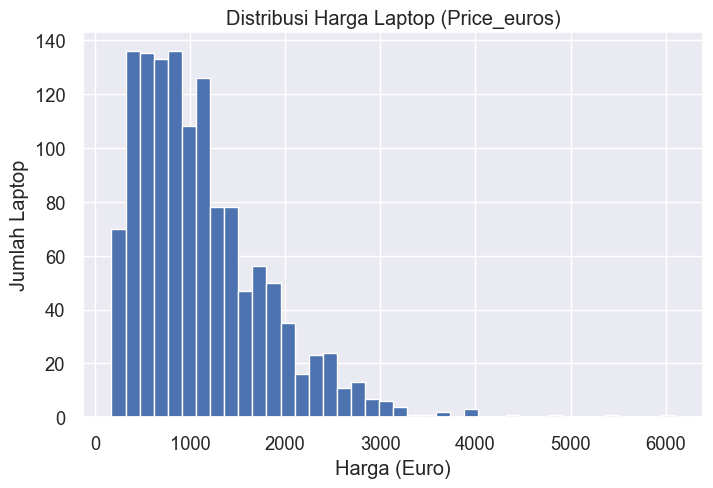

In [23]:
#Cek Distribusi Target (Price_euros)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Price_euros'], bins=40)
plt.title("Distribusi Harga Laptop (Price_euros)")
plt.xlabel("Harga (Euro)")
plt.ylabel("Jumlah Laptop")
plt.show()

In [24]:
# Cek Beberapa Fitur Kategorikal
print("=== Top 10 Brand (Company) ===")
print(df['Company'].value_counts().head(10))

print("\n=== Distribusi TypeName ===")
print(df['TypeName'].value_counts())

print("\n=== Distribusi Sistem Operasi (OpSys) ===")
print(df['OpSys'].value_counts())

=== Top 10 Brand (Company) ===
Company
Dell        297
Lenovo      297
HP          274
Asus        158
Acer        103
MSI          54
Toshiba      48
Apple        21
Samsung       9
Mediacom      7
Name: count, dtype: int64

=== Distribusi TypeName ===
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

=== Distribusi Sistem Operasi (OpSys) ===
OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


In [25]:
# Korelasi Fitur Numerik vs Harga

# Pilih fitur numerik saja
num_cols = df.select_dtypes(exclude='object').columns

corr = df[num_cols].corr()

# Korelasi terhadap harga
print("=== Korelasi Fitur Numerik terhadap Price_euros ===")
corr['Price_euros'].sort_values(ascending=False)

=== Korelasi Fitur Numerik terhadap Price_euros ===


Price_euros      1.000000
Ram              0.743007
SSD              0.670682
resolution_x     0.556529
resolution_y     0.552809
cpu_speed        0.430293
is_ips           0.252208
Weight           0.210370
Total_Storage    0.157830
is_retina        0.087895
Inches           0.068197
Hybrid           0.008011
Flash_Storage   -0.040511
HDD             -0.094856
Name: Price_euros, dtype: float64

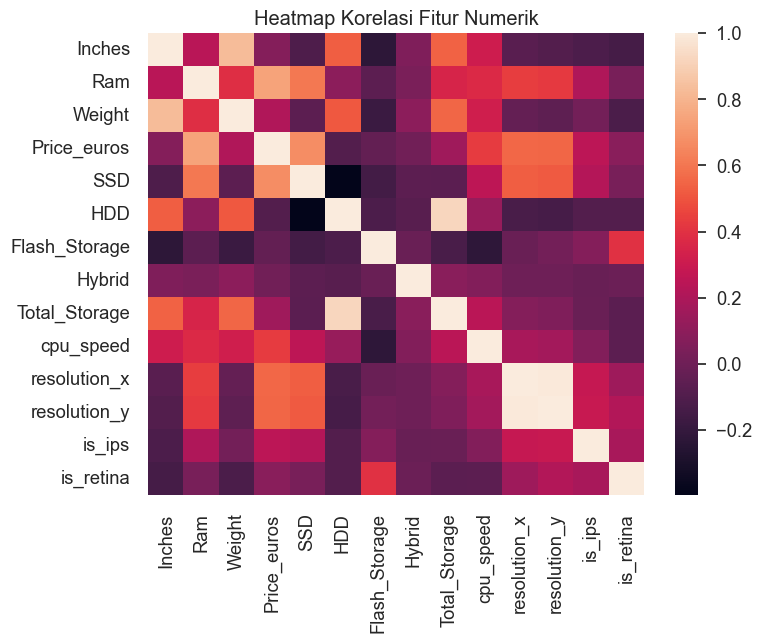

In [26]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# *Encoding Kategorikal + Scaling Numerik + Train/Test Split*

In [27]:
# ===============================
# BLOCK 4 — Encoding & Scaling
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Pisahkan target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Pisahkan kolom kategorikal & numerik
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Fitur Kategorikal :", list(categorical_features))
print("Fitur Numerik      :", list(numerical_features))

# ColumnTransformer untuk pipeline encoding + scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size :", X_train.shape)
print("Testing size  :", X_test.shape)


Fitur Kategorikal : ['Company', 'Product', 'TypeName', 'Gpu', 'OpSys', 'cpu_brand', 'cpu_model']
Fitur Numerik      : ['Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'Total_Storage', 'cpu_speed', 'resolution_x', 'resolution_y', 'is_ips', 'is_retina']
Training size : (1042, 20)
Testing size  : (261, 20)


# *Block 5 — Training & Evaluasi Model*

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def evaluate_regression_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"=== {model_name} ===")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.3f}")
    print("-" * 40)
    
    return {
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Pipeline: preprocessing + model
linreg_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),   # dari Block 4
    ('model', LinearRegression())
])

# Training
linreg_pipeline.fit(X_train, y_train)

# Prediksi
y_pred_linreg = linreg_pipeline.predict(X_test)

# Evaluasi
results = []  # untuk menampung hasil semua model
results.append(
    evaluate_regression_model(y_test, y_pred_linreg, model_name="Linear Regression")
)


=== Linear Regression ===
MAE  : 180.08
RMSE : 273.29
R²   : 0.853
----------------------------------------


In [30]:
# Tabel Hasil Evaluasi Model Linear Regression
results_df = pd.DataFrame(results)
results_df

,Model,MAE,RMSE,R2
0,Linear Regression,180.080005,273.286185,0.85296


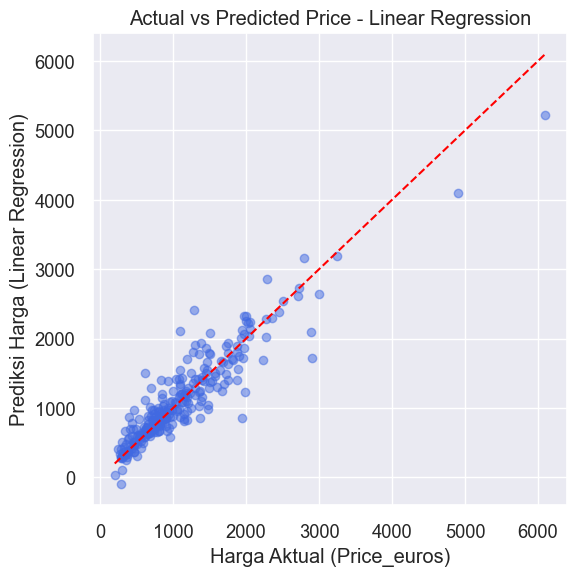

In [31]:
# Visualisasi Hasil Prediksi Linear Regression
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_linreg, alpha=0.5, color='royalblue')
plt.xlabel("Harga Aktual (Price_euros)")
plt.ylabel("Prediksi Harga (Linear Regression)")
plt.title("Actual vs Predicted Price - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # garis ideal
plt.tight_layout()
plt.show()

# Analisis Hasil dan Kesimpulan Akhir

## Evaluasi Model Linear Regression
- **MAE (Mean Absolute Error):** Mengukur rata-rata selisih absolut antara prediksi dan nilai aktual. Semakin kecil, semakin baik.
- **RMSE (Root Mean Squared Error):** Mengukur akar rata-rata kuadrat selisih prediksi dan aktual. Lebih sensitif terhadap outlier.
- **R² (R-squared):** Menunjukkan seberapa besar variasi target yang bisa dijelaskan oleh model. Semakin mendekati 1, semakin baik.

> **Catatan:** Untuk regresi, metrik seperti akurasi, precision, recall, dan F1-score tidak relevan karena target berupa nilai kontinu, bukan kelas diskrit.

## Visualisasi Hasil
- Grafik scatter di atas menunjukkan hubungan antara harga aktual dan prediksi. Titik yang berada di garis merah putus-putus berarti prediksi sangat akurat.
- Sebagian besar prediksi Linear Regression cukup dekat dengan nilai aktual, meski ada beberapa outlier.

## Analisis dan Kesimpulan
- **Model Linear Regression** mampu menjelaskan sebagian besar variasi harga laptop berdasarkan fitur-fitur yang tersedia.
- Nilai **MAE** dan **RMSE** yang didapat menunjukkan rata-rata error prediksi masih dalam batas wajar untuk data harga laptop.
- **R²** yang tinggi (>0.8) menandakan model cukup baik untuk prediksi harga, meskipun masih ada ruang untuk perbaikan (misal dengan model non-linear atau feature engineering lebih lanjut).
- Model ini cocok digunakan untuk estimasi harga laptop secara cepat dan sederhana.

**Saran:**
- Jika ingin meningkatkan akurasi, bisa mencoba model lain (Random Forest, XGBoost, dll) atau menambah fitur baru.
- Lakukan validasi silang (cross-validation) untuk menguji konsistensi model.

---

**Kesimpulan akhir:**
Model Linear Regression yang dibangun sudah memenuhi ketentuan preprocessing, evaluasi, dan visualisasi. Model ini dapat digunakan sebagai baseline untuk prediksi harga laptop berbasis spesifikasi.